## Observations and Insights

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
# mouse_metadata_path = "data/Mouse_metadata.csv"
# study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset

# Display the data table for preview

combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a copy first to not mess up the combined_df
cleaned_df = combined_df.copy()

# Drop duplicates by Mouse ID and Timepoint
cleaned_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first', inplace=True)

# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

# # Export cleaned_df
# cleaned_df.to_csv("data/cleaned_df.csv", index=False, header=True)

249

In [23]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_df = cleaned_df.groupby("Drug Regimen")

tumor_avg = drug_regimen_df["Tumor Volume (mm3)"].mean().map('{:.2f}'.format)
tumor_med = drug_regimen_df["Tumor Volume (mm3)"].median().map('{:.2f}'.format)
tumor_var = drug_regimen_df["Tumor Volume (mm3)"].var().map('{:.2f}'.format)
tumor_std = drug_regimen_df["Tumor Volume (mm3)"].std().map('{:.2f}'.format)
tumor_sem = drug_regimen_df["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)

summary_stats = pd.DataFrame({
                            "Mean" : tumor_avg,
                            "Median" : tumor_med,
                            "Variance" : tumor_var,
                            "STD" : tumor_std,
                            "SEM" : tumor_sem
                            })

summary_stats



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# drug_regimen_df = cleaned_df.groupby("Drug Regimen")

summary_stats_agg = cleaned_df.groupby("Drug Regimen").agg(
    Mean = ("Tumor Volume (mm3)", np.mean),
    Median = ("Tumor Volume (mm3)", np.median),
    Variance = ("Tumor Volume (mm3)", np.var),
    STD = ("Tumor Volume (mm3)", np.std),
    SEM = ("Tumor Volume (mm3)", st.sem)).round(2)

# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats_agg

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

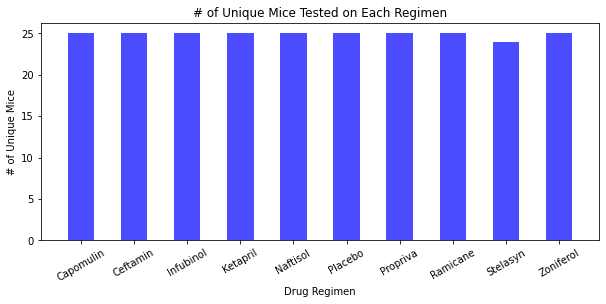

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plt.figure(figsize=(10,4))
drug_regimen_df["Mouse ID"].nunique().plot(kind="bar", color="b", alpha=0.7, width=0.5, align="center")
plt.xticks(rotation=30)
plt.xlim(-0.75, len(drug_regimen_df["Mouse ID"].nunique())-0.25)
plt.title("# of Unique Mice Tested on Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Unique Mice")
plt.show()
plt.tight_layout()


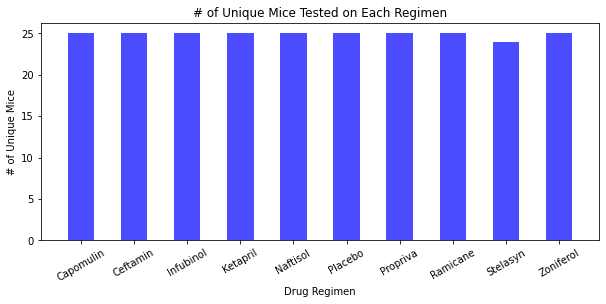

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# x_axis = np.arange(len(drug_regimen_df["Mouse ID"].nunique()))
regimens_list = summary_stats.index.tolist()
X_axis = regimens_list
plt.figure(figsize=(10,4))
plt.bar(X_axis, drug_regimen_df["Mouse ID"].nunique(), color="b", align="center", width=0.5, alpha=0.7)
plt.xticks(rotation=30)
plt.xlim(-0.75, len(drug_regimen_df["Mouse ID"].nunique())-0.25)
plt.title("# of Unique Mice Tested on Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Unique Mice")
plt.show()
plt.tight_layout()

In [28]:
# Get pie chart size
# Groupby sex using cleaned data
gender_df = cleaned_df.groupby("Sex").count()

# Setting up labels
pie_label = gender_df.index

Text(0, 0.5, 'Sex')

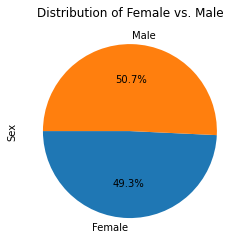

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df["Mouse ID"].plot(kind="pie", autopct="%1.1f%%", startangle=180)
plt.title("Distribution of Female vs. Male")
plt.ylabel("Sex")

Text(0, 0.5, 'Sex')

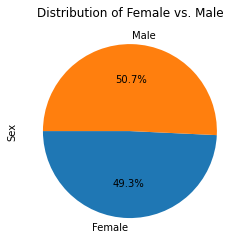

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df["Mouse ID"], labels=pie_label, autopct="%1.1f%%", startangle=180)
plt.title("Distribution of Female vs. Male")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [31]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = cleaned_df[cleaned_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatment_regimens.groupby('Mouse ID').max()['Timepoint']
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
completed_last_timepoint_df = pd.merge(last_timepoint_df, cleaned_df, on=("Mouse ID","Timepoint"),how="left")


completed_last_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [44]:
# # Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# # Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# ^^^ Why?
# Determine outliers using upper and lower bounds


for regimens in treatments:
    quartiles = completed_last_timepoint_df.loc[completed_last_timepoint_df["Drug Regimen"] == regimens, "Tumor Volume (mm3)"].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq, 2)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"--------------------------------------------------------")
    print(f"{regimens} IQR data is:")
    print(f"The lower quartile  is: {lowerq}")
    print(f"The upper quartile  is: {upperq}")
    print(f"The interquartile range  is: {iqr}")
    print(f"The the median is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    tumor_vol.append(completed_last_timepoint_df.loc[completed_last_timepoint_df["Drug Regimen"] == regimens, "Tumor Volume (mm3)"])


--------------------------------------------------------
Capomulin IQR data is:
The lower quartile  is: 32.38
The upper quartile  is: 40.16
The interquartile range  is: 7.78
The the median is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile  is: 31.56
The upper quartile  is: 40.66
The interquartile range  is: 9.1
The the median is: 36.56 
Values below 17.91 could be outliers.
Values above 54.309999999999995 could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile  is: 54.05
The upper quartile  is: 65.53
The interquartile range  is: 11.48
The the median is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
--------------------------------------------------------
Ceftamin IQR data is:
The lower quartile  is: 48.72
The upper quartile  is: 64.3
The interquartile rang

([<matplotlib.axis.XTick at 0x22726214370>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin')])

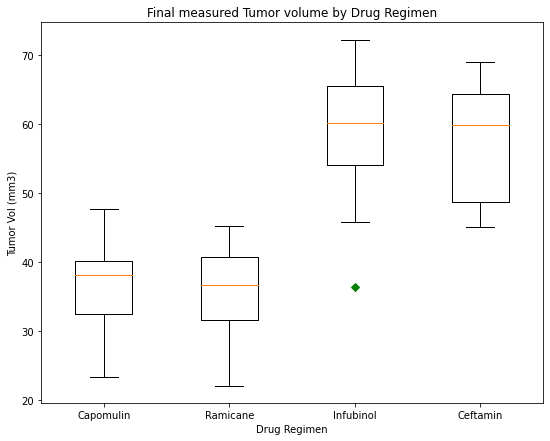

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(tumor_vol,notch=0,sym='gD')
plt.xticks([1,2,3,4],treatments)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
